In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [5]:
#Load The Past prices from the csv file
sales_data = pd.read_csv('../Backend/gold_monthly_csv.csv')

In [6]:
#Convert the "Date" column to datetime object and set index as date
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%Y-%m')
sales_data.set_index('Date', inplace=True)
sales_data

,Price
Date,
1950-01-01,34.730
1950-02-01,34.730
1950-03-01,34.730
1950-04-01,34.730
1950-05-01,34.730
...,...
2020-03-01,1593.764
2020-04-01,1680.030
2020-05-01,1715.697


In [7]:
monthly_sales_data = sales_data.resample('m').sum()
monthly_sales_data

,Price
Date,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2020-03-31,1593.764
2020-04-30,1680.030
2020-05-31,1715.697


In [8]:
yearly_sales_data = sales_data.resample('Y').sum()
yearly_sales_data

,Price
Date,
1950-12-31,416.750
1951-12-31,416.610
1952-12-31,415.540
1953-12-31,418.550
1954-12-31,420.240
...,...
2016-12-31,14977.942
2017-12-31,15094.183
2018-12-31,15238.231


<AxesSubplot:xlabel='Date'>

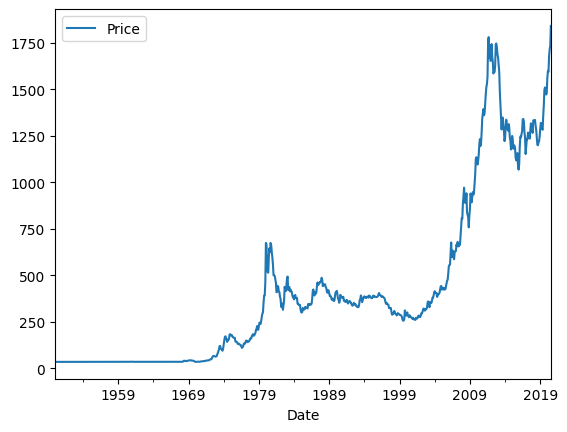

In [9]:
monthly_sales_data.plot()

<AxesSubplot:xlabel='Date'>

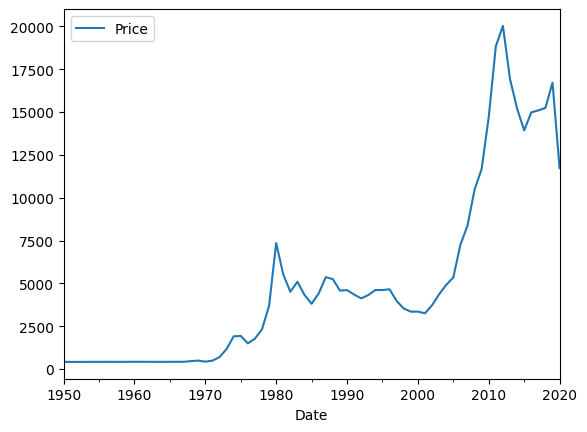

In [10]:
yearly_sales_data.plot()

In [11]:
# Function to train arima model
def train_arima_model(data):
    model = ARIMA(data, order=(1,0,0))
    model_fit = model.fit()
    return model_fit

In [12]:
#Function to train sarima model
def train_sarima_model(data):
    model = SARIMAX(data, order=(1,0,0), seasonal_order=(0,1,1,12))
    model_fit = model.fit()
    return model_fit

In [13]:
#Train Arima model on monthly data
arima_model_monthly = train_arima_model(monthly_sales_data['Price'])

e:\Digiverz\Backend\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [14]:
#train sarima model on monthly data
sarima_model_monthly = train_sarima_model(monthly_sales_data['Price'])

In [15]:
#Train Arima model on yearly data
arima_model_yearly = train_arima_model(yearly_sales_data['Price'])

In [16]:
#Train Sarima Model on yearly data
sarima_model_yearly = train_sarima_model(yearly_sales_data['Price'])

Monthly predictions using both models

In [17]:
#Forecast future sales using ARIMA model on monthly basis..
forecast_arima_monthly = arima_model_monthly.forecast(steps=25)
forecast_arima_monthly

2020-08-31    1840.243233
2020-09-30    1839.679688
2020-10-31    1839.116367
2020-11-30    1838.553270
2020-12-31    1837.990395
2021-01-31    1837.427743
2021-02-28    1836.865314
2021-03-31    1836.303107
2021-04-30    1835.741123
2021-05-31    1835.179362
2021-06-30    1834.617824
2021-07-31    1834.056507
2021-08-31    1833.495413
2021-09-30    1832.934542
2021-10-31    1832.373892
2021-11-30    1831.813464
2021-12-31    1831.253259
2022-01-31    1830.693275
2022-02-28    1830.133513
2022-03-31    1829.573973
2022-04-30    1829.014654
2022-05-31    1828.455557
2022-06-30    1827.896681
2022-07-31    1827.338026
2022-08-31    1826.779593
Freq: M, Name: predicted_mean, dtype: float64

In [18]:
#Forecast future sales using sarima model on monthly basis...
forecast_sarima_monthly = sarima_model_monthly.forecast(steps=25)
forecast_sarima_monthly

2020-08-31    1850.566727
2020-09-30    1859.780076
2020-10-31    1857.617627
2020-11-30    1855.002526
2020-12-31    1851.074720
2021-01-31    1866.774845
2021-02-28    1879.405504
2021-03-31    1876.154664
2021-04-30    1876.944439
2021-05-31    1876.192563
2021-06-30    1876.961189
2021-07-31    1882.062909
2021-08-31    1891.803484
2021-09-30    1900.997690
2021-10-31    1898.816107
2021-11-30    1896.181879
2021-12-31    1892.234957
2022-01-31    1907.915974
2022-02-28    1920.527533
2022-03-31    1917.257604
2022-04-30    1918.028297
2022-05-31    1917.257348
2022-06-30    1918.006912
2022-07-31    1923.089577
2022-08-31    1932.811105
Freq: M, Name: predicted_mean, dtype: float64

Yearly predictions using both models

In [19]:
#Forecast future sales using arima model on yearly basis..
forecast_arima_yearly = arima_model_yearly.forecast(steps=12)
forecast_arima_yearly

2021-12-31    11550.201374
2022-12-31    11381.049282
2023-12-31    11216.245020
2024-12-31    11055.676832
2025-12-31    10899.235837
2026-12-31    10746.815950
2027-12-31    10598.313813
2028-12-31    10453.628727
2029-12-31    10312.662579
2030-12-31    10175.319779
2031-12-31    10041.507193
2032-12-31     9911.134082
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [20]:
#Forecast future sales using sarima model on yearly basis..
forecast_sarima_yearly = sarima_model_yearly.forecast(steps=12)
forecast_sarima_yearly

2021-12-31    11724.382269
2022-12-31    12383.965491
2023-12-31    13071.222033
2024-12-31    13093.404799
2025-12-31    12465.282372
2026-12-31    12291.621790
2027-12-31    12280.927310
2028-12-31    12990.994224
2029-12-31    12729.012954
2030-12-31    12844.370178
2031-12-31    13273.430984
2032-12-31    12661.889491
Freq: A-DEC, Name: predicted_mean, dtype: float64

Monthly Forecast

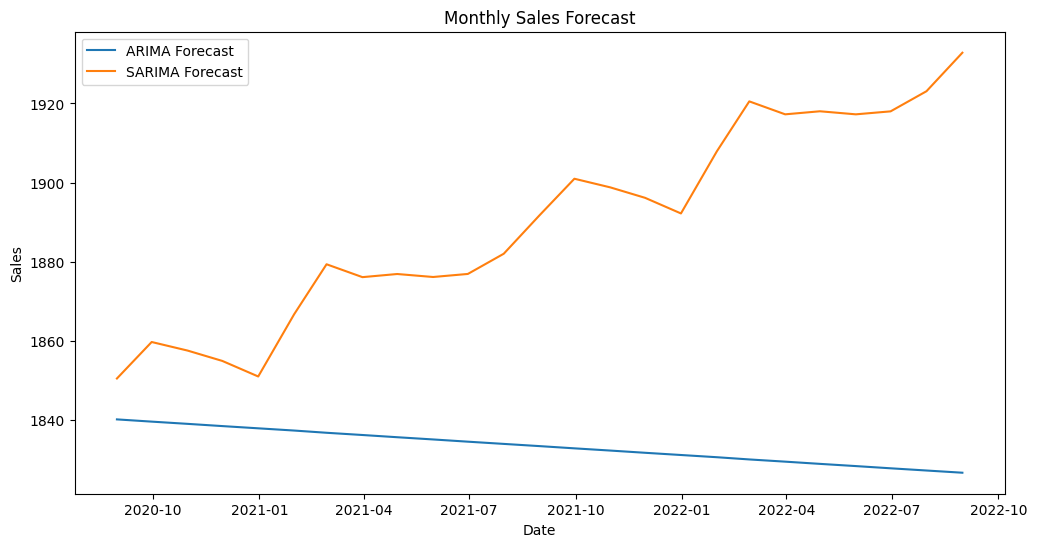

In [21]:
#Plot The Monthly Forecast
plt.figure(figsize=(12,6))
# plt.plot(monthly_sales_data.index, monthly_sales_data['Price'], label='Actual Sales')
plt.plot(forecast_arima_monthly.index, forecast_arima_monthly, label='ARIMA Forecast')
plt.plot(forecast_sarima_monthly.index, forecast_sarima_monthly, label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.show()

Yearly Forecast

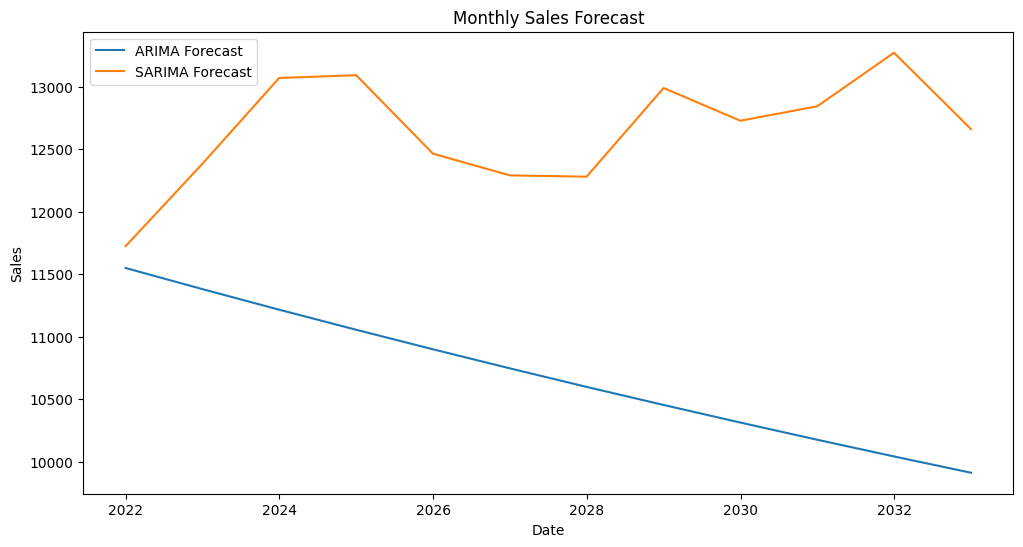

In [22]:
# Plot for yearly forecast
plt.figure(figsize=(12,6))
# plt.plot(yearly_sales_data.index, yearly_sales_data['Price'], label='Actual Sales')
plt.plot(forecast_arima_yearly.index, forecast_arima_yearly, label='ARIMA Forecast')
plt.plot(forecast_sarima_yearly.index, forecast_sarima_yearly, label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.show()